# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [138]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

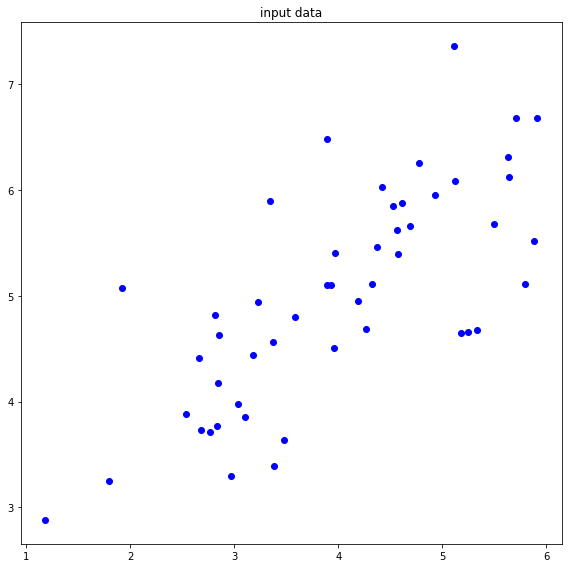

In [139]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'o', color = 'blue')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x : -1.509903313490213e-16
mean of y : -4.840572387365683e-16
std of x : 0.9999999999999999
std of y : 0.9999999999999999


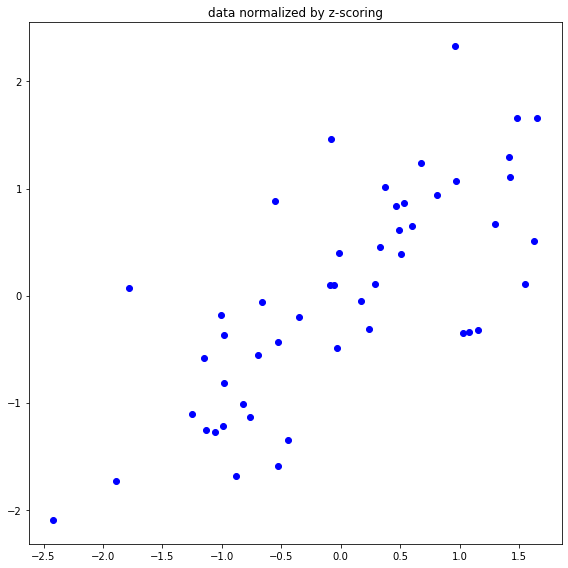

In [140]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

x = (x - x_mean)/x_std
y = (y - y_mean)/y_std

feature = np.array([x, y]).T

print('mean of x : {}'.format(np.mean(x)))
print('mean of y : {}'.format(np.mean(y)))
print('std of x : {}'.format(np.std(x)))
print('std of y : {}'.format(np.std(y)))
plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

plt.tight_layout()
plt.show()

## compute covariance matrix

In [49]:
Z = feature
Sigma = (1/feature.shape[0])*Z.T@Z
print(Sigma)

[[17.26276298 20.82287017]
 [20.82287017 26.05448463]]


In [50]:
def compute_covariance(feature):
    
    Z = feature
    Sigma = (1/feature.shape[0])*Z.T@Z
    
    return Sigma

## compute principal directions

In [83]:
def compute_eigen(X):
    
    S,U = np.linalg.eig(X)
    #eigenvalue, eigenvector
    
    idx = np.argsort(S)
    S = S[idx]
    U = U[idx]
    #sort in terms of eigenvalue
    
    return S, U

[0.26447 1.73553]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


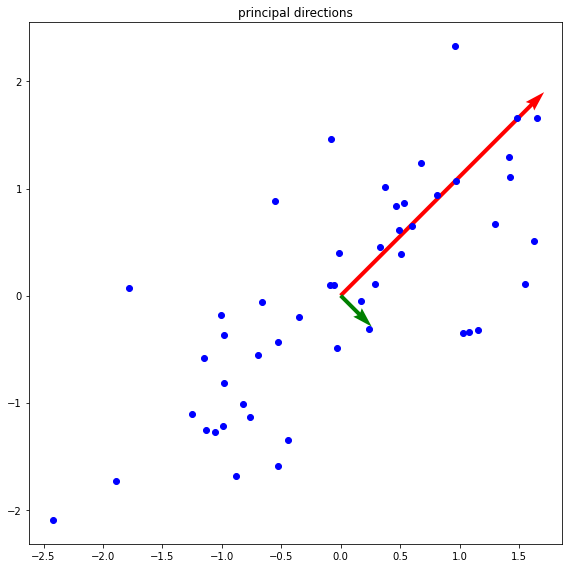

In [85]:
plt.figure(figsize=(8,8))
plt.title('principal directions')

S, U = compute_eigen(compute_covariance(feature))
print(S)
print(U)

plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')
plt.quiver([0, 0], [0, 0], U[:,0], U[:,1], color=['r','g'], scale=S*7)

plt.tight_layout()
plt.show()

## first principal axis

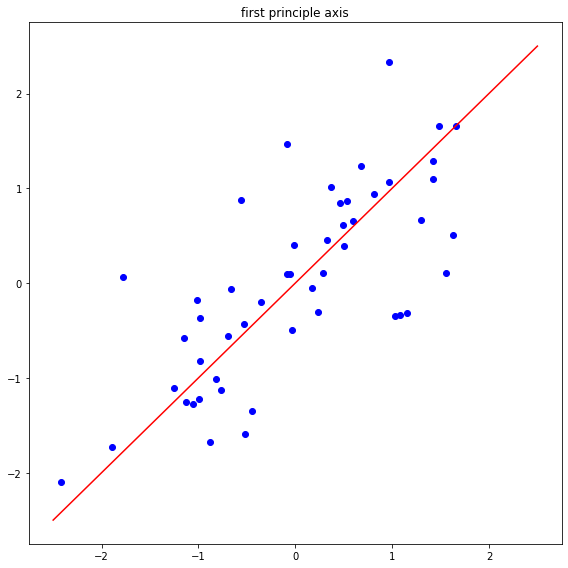

In [126]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')

first = U[:,0]
plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

x1 = np.arange(-2.5, 3)
y1 = (first[1]/first[0])*x1
plt.plot(x1, y1, '-', color='red')

plt.tight_layout()
plt.show()

## second principal axis

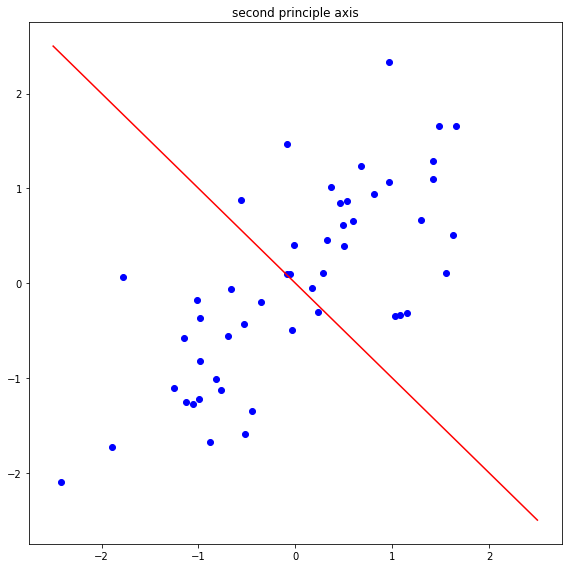

In [131]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')

second = U[:,1]
plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

x2 = np.arange(-2.5, 3)
y2 = (second[1]/second[0])*x1
plt.plot(x2, y2, '-', color='red')

plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [128]:
a = np.dot(feature, vector)*vector[0]
b = np.dot(feature, vector)*vector[1]
print(np.array([a,b]).T.shape)
print(feature.shape)

(50, 2)
(50, 2)


In [129]:
def compute_projection_onto_line(feature, vector):
    
    a = np.dot(feature, vector)*vector[0]
    b = np.dot(feature, vector)*vector[1]
    projection = np.array([a,b]).T
    
    return projection

## projcet to the first principal axis

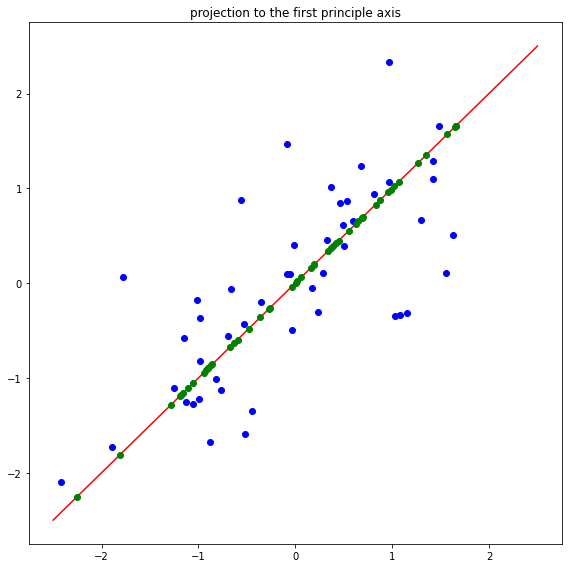

In [134]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

first = U[:,0]
plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

x1 = np.arange(-2.5,3)
y1 = (first[1]/first[0])*x1
plt.plot(x1, y1, '-', color='red')

projection = compute_projection_onto_line(feature, first)
plt.plot(projection[:,0], projection[:,1], 'o', color = 'green')

plt.tight_layout()
plt.show()

## projcet to the second principal axis

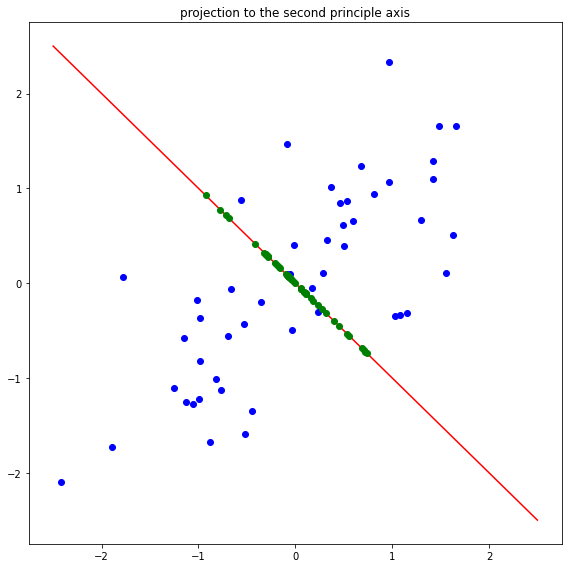

In [135]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

second = U[:,1]
plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

x2 = np.arange(-2.5, 3)
y2 = (second[1]/second[0])*x1
plt.plot(x2, y2, '-', color='red')

projection = compute_projection_onto_line(feature, second)
plt.plot(projection[:,0], projection[:,1], 'o', color = 'green')

plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

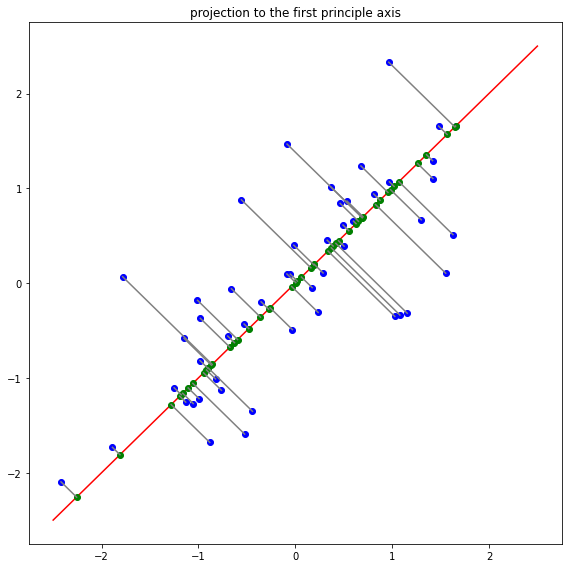

In [136]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

first = U[:,0]
plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

x1 = np.arange(-2.5,3)
y1 = (first[1]/first[0])*x1
plt.plot(x1, y1, '-', color='red')

projection = compute_projection_onto_line(feature, first)
plt.plot(projection[:,0], projection[:,1], 'o', color = 'green')

for i in range(feature.shape[0]):
    temp_x = [feature[i,0], projection[i,0]]
    temp_y = [feature[i,1], projection[i,1]]
    plt.plot(temp_x, temp_y, '-', color='gray')

plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

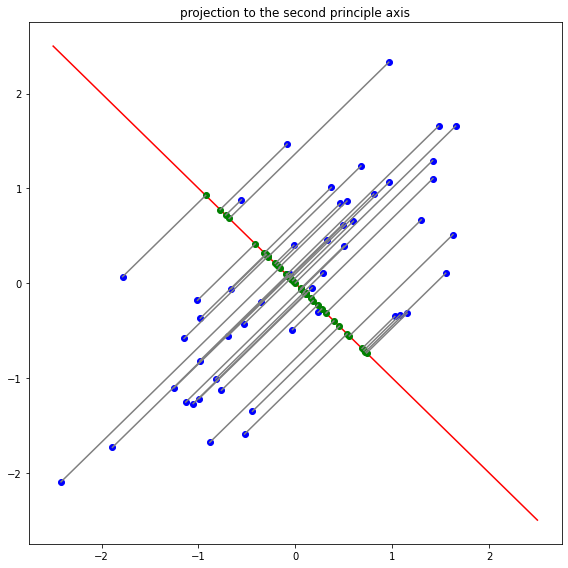

In [137]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

second = U[:,1]
plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

x2 = np.arange(-2.5, 3)
y2 = (second[1]/second[0])*x1
plt.plot(x2, y2, '-', color='red')

projection = compute_projection_onto_line(feature, second)
plt.plot(projection[:,0], projection[:,1], 'o', color = 'green')

for i in range(feature.shape[0]):
    temp_x = [feature[i,0], projection[i,0]]
    temp_y = [feature[i,1], projection[i,1]]
    plt.plot(temp_x, temp_y, '-', color='gray')

plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

In [143]:
def plot_data(feature):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

    plt.tight_layout()
    plt.show()

In [144]:
def plot_principle_directions(feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    S, U = compute_eigen(compute_covariance(feature))

    plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')
    plt.quiver([0, 0], [0, 0], U[:,0], U[:,1], color=['r','g'], scale=S*7)

    plt.tight_layout()
    plt.show()


In [153]:
def plot_first_principle_axis(feature, U):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    first = U[:,0]
    plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

    x1 = np.arange(-2.5, 3)
    y1 = (first[1]/first[0])*x1
    plt.plot(x1, y1, '-', color='red')

    plt.tight_layout()
    plt.show()

In [154]:
def plot_second_principle_axis(feature, U):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    second = U[:,1]
    plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

    x2 = np.arange(-2.5, 3)
    y2 = (second[1]/second[0])*x1
    plt.plot(x2, y2, '-', color='red')

    plt.tight_layout()
    plt.show()

In [161]:
def project_to_first_principle_axis(feature, U, connect = False):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    first = U[:,0]
    plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

    x1 = np.arange(-2.5,3)
    y1 = (first[1]/first[0])*x1
    plt.plot(x1, y1, '-', color='red')

    projection = compute_projection_onto_line(feature, first)
    plt.plot(projection[:,0], projection[:,1], 'o', color = 'green')
    
    if(connect == True):
        for i in range(feature.shape[0]):
            temp_x = [feature[i,0], projection[i,0]]
            temp_y = [feature[i,1], projection[i,1]]
            plt.plot(temp_x, temp_y, '-', color='gray')

    plt.tight_layout()
    plt.show()

In [162]:
def project_to_second_principle_axis(feature, U, connect = False):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    second = U[:,1]
    plt.plot(feature[:,0], feature[:,1], 'o', color = 'blue')

    x2 = np.arange(-2.5, 3)
    y2 = (second[1]/second[0])*x1
    plt.plot(x2, y2, '-', color='red')

    projection = compute_projection_onto_line(feature, second)
    plt.plot(projection[:,0], projection[:,1], 'o', color = 'green')

    if(connect == True):
        for i in range(feature.shape[0]):
            temp_x = [feature[i,0], projection[i,0]]
            temp_y = [feature[i,1], projection[i,1]]
            plt.plot(temp_x, temp_y, '-', color='gray')
    
    plt.tight_layout()
    plt.show()

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

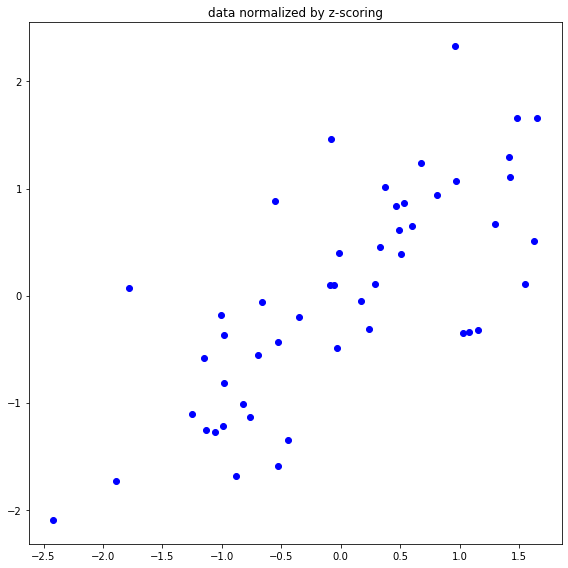

In [145]:
plot_data(feature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

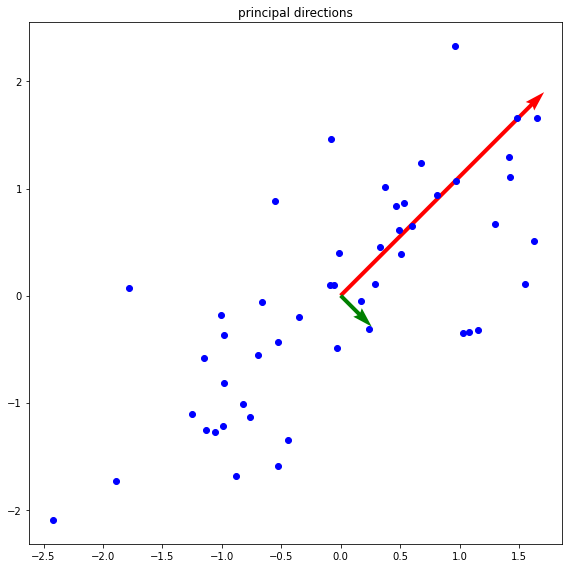

In [146]:
plot_principle_directions(feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

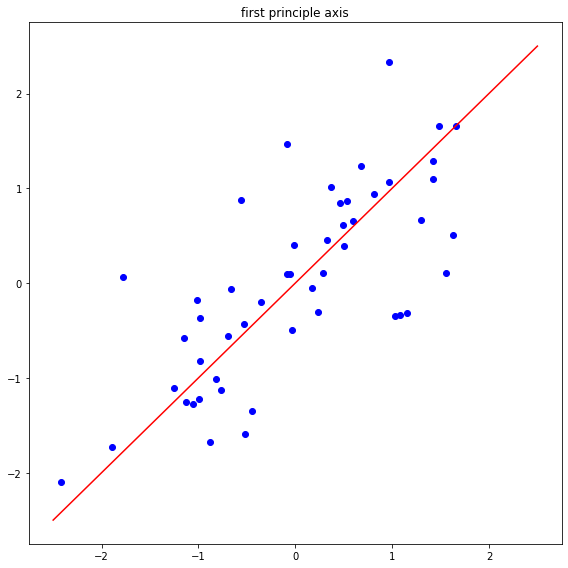

In [155]:
plot_first_principle_axis(feature, U)

***

### 4. plot the second principal axis in red on the normalized data in blue

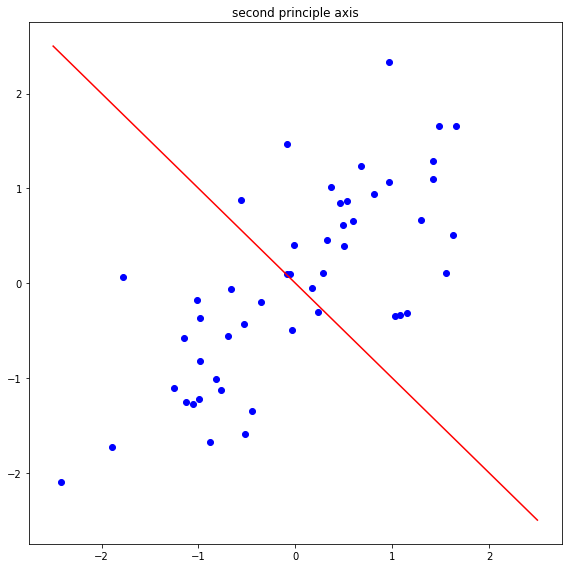

In [156]:
plot_second_principle_axis(feature, U)

***

### 5. plot the projection of data in green onto the first principal axis in red

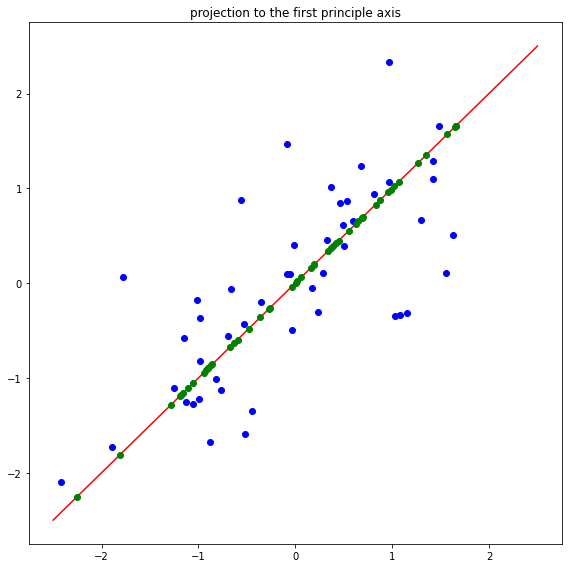

In [163]:
project_to_first_principle_axis(feature, U)

***

### 6. plot the projection of data in green onto the second principal axis in red

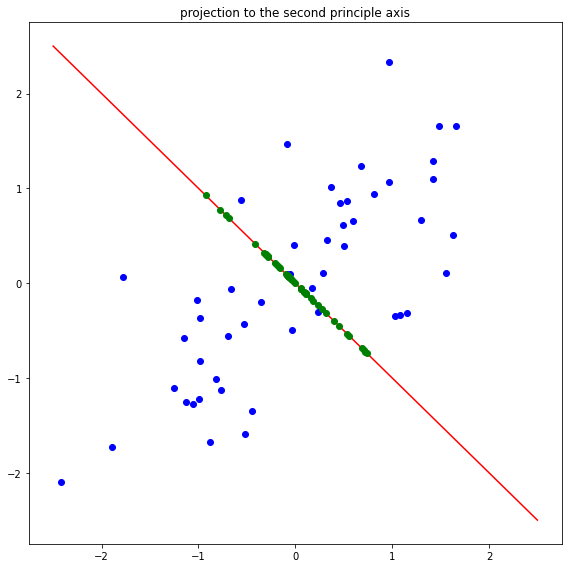

In [164]:
project_to_second_principle_axis(feature, U)

***

### 7. plot the projection line in grey onto the first principal axis

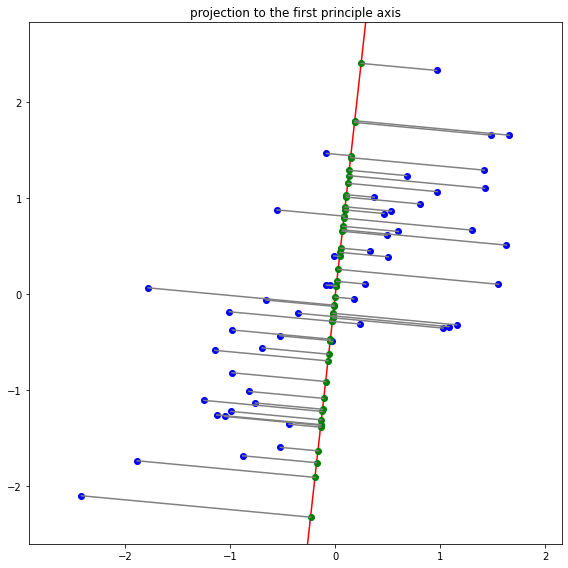

***

### 8. plot the projection line in grey onto the second principal axis

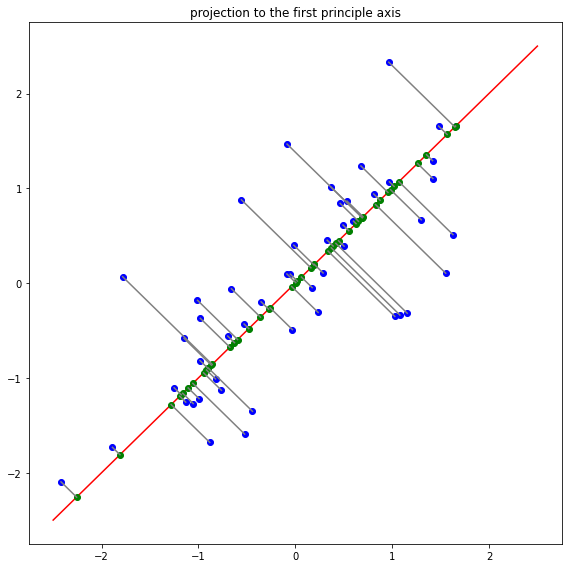

In [166]:
project_to_first_principle_axis(feature, U, connect = True)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***